## 1. Setup enviorment

In [1]:
from Preprocessing.time_series_preprocessing import get_dengue_dataset, get_municipality_name
from Preprocessing.time_series_preprocessing import preprocess_dataset_to_time_series

from Models.LSTM import create_model, train_model
import tensorflow as tf

from Utils.test_lstm import evaluate, plot_predictions, calculate_mean_std, evaluate_lstm_for_city

import pandas as pd
import os
import numpy as np

### Constants

In [2]:
""" Read Dataset:"""
embeddings = None
labels = '../Tabular_data/dengue_tabular.csv'

#Municipality='Medellín'

""" Dataset Preprocessing:"""
train_percentage = 80
T=3
autoregressive = True

""" Model Parameters:"""
lstm_layers=[1000, 500]
nn_layers=[250, 120, 1]
dense_acivation='relu'
recurrent_cells='LSTM'
bidirectional=False


## Create and Evaluate Model for a City

In [3]:
def run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=True, epochs=100, batch_size=16, n_tests=3, plot_samples=True):
    results = {}
    
    if type(embeddings) == list:
        for embedding in embeddings:
            results[embedding] = {}
            if type(Municipality) == list:
                for municipality in Municipality:
                    rmse, mape, smape = evaluate_lstm_for_city(labels, embedding, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples)
                    results[embedding][municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
            else:
                rmse, mape, smape = rmse, mape, smapeevaluate_lstm_for_city(labels, embedding, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples)
                results[embedding][Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    else:
        if type(Municipality) == list:
            for municipality in Municipality:
                rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples)
                results[municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
        else:
            rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples)
            results[Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    
    return results

## Run Experiments

In [4]:
# Get list of municipalities:
Municipality = list(pd.unique(pd.read_csv('Embeddings/ResNet50V2_224_1024.csv')['Municipality Code']))

####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Cúcuta-----------------------------------------------
####################################################################################################
The train shape is: (540, 1)
The test shape is: (136, 1)
The shape of the features is (537, 3)
The shape of the labels is (537, 1)
The shape of the features is (133, 3)
The shape of the labels is (133, 1)
The initial shapes are:
The train shape is (537, 3)
The test shape is (133, 3)
-----------------------
The Final shapes are:
The train shape is (537, 3, 1)
The test shape is (133, 3, 1)


2023-02-12 19:32:15.359868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-12 19:32:15.359914: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-12 19:32:15.359938: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9f7bdfccc75e): /proc/driver/nvidia/version does not exist
2023-02-12 19:32:15.360138: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-12 19:32:16.726997: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] 

Restoring model weights from the end of the best epoch.
Epoch 00043: early stopping
Test MAPE: 73.798
Test sMAPE: 74.176
Test RMSE: 16.049
{'mape': 73.79800199134738, 'smape': 74.17620443567439, 'rmse': 16.04926475911337}


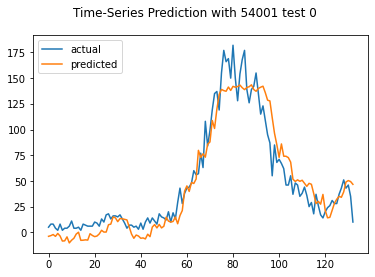

Restoring model weights from the end of the best epoch.
Epoch 00039: early stopping
Test MAPE: 139.353
Test sMAPE: 59.986
Test RMSE: 29.053
{'mape': 139.35309797458007, 'smape': 59.98616668290008, 'rmse': 29.05296262688014}


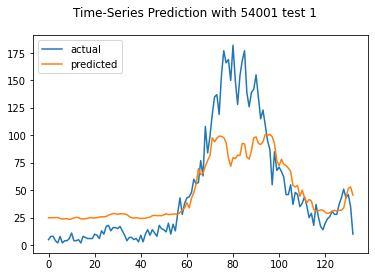

Restoring model weights from the end of the best epoch.
Epoch 00048: early stopping
Test MAPE: 143.341
Test sMAPE: 57.098
Test RMSE: 20.565
{'mape': 143.3409004732593, 'smape': 57.09831783870926, 'rmse': 20.565138673842668}


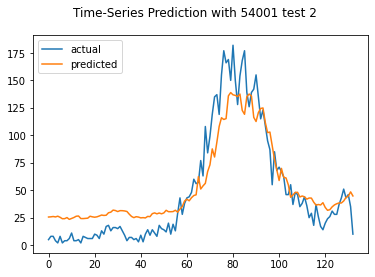

rmse : average=21.889, std=5.391
mape : average=118.831, std=31.884
smape : average=63.754, std=7.464
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Neiva------------------------------------------------
####################################################################################################
The train shape is: (540, 1)
The test shape is: (136, 1)
The shape of the features is (537

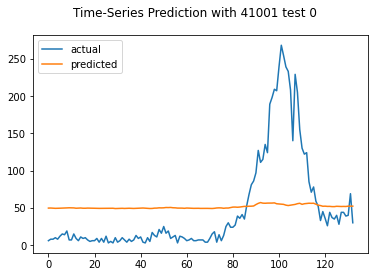

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAPE: 342.426
Test sMAPE: 107.766
Test RMSE: 66.873
{'mape': 342.42568720878904, 'smape': 107.76586935562503, 'rmse': 66.87254799065785}


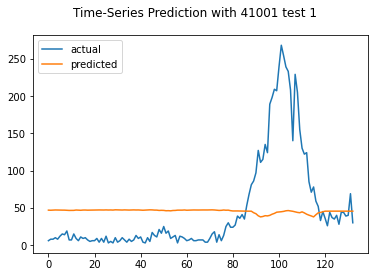

Restoring model weights from the end of the best epoch.
Epoch 00034: early stopping
Test MAPE: 217.436
Test sMAPE: 87.269
Test RMSE: 55.962
{'mape': 217.43596968986725, 'smape': 87.26850169118198, 'rmse': 55.962015193242514}


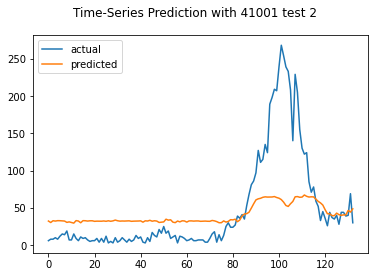

rmse : average=62.186, std=4.585
mape : average=307.639, std=64.337
smape : average=100.545, std=9.400
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Medellín----------------------------------------------
####################################################################################################
The train shape is: (540, 1)
The test shape is: (136, 1)
The shape of the features is (53

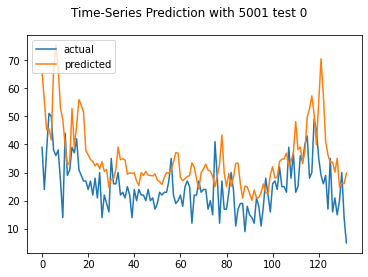

Restoring model weights from the end of the best epoch.
Epoch 00043: early stopping
Test MAPE: 40.350
Test sMAPE: 52.740
Test RMSE: 11.990
{'mape': 40.350374408448225, 'smape': 52.73977879548348, 'rmse': 11.990419706057297}


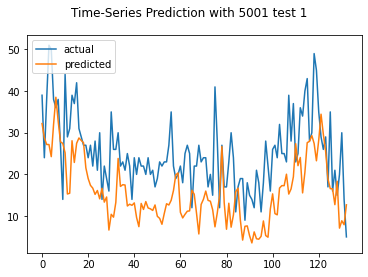

Restoring model weights from the end of the best epoch.
Epoch 00048: early stopping
Test MAPE: 31.772
Test sMAPE: 31.724
Test RMSE: 9.608
{'mape': 31.772101909678955, 'smape': 31.723666814924883, 'rmse': 9.608128134969125}


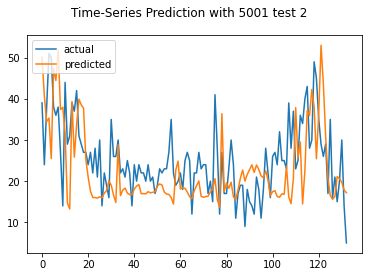

rmse : average=11.804, std=1.722
mape : average=41.833, std=8.882
smape : average=40.379, std=8.971
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
-------------------------------------------Villavicencio--------------------------------------------
####################################################################################################
The train shape is: (540, 1)
The test shape is: (136, 1)
The shape of the features is (537, 

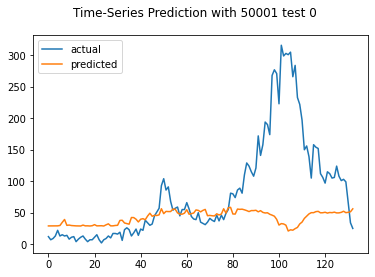

Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Test MAPE: 228.222
Test sMAPE: 84.883
Test RMSE: 84.104
{'mape': 228.22152765371197, 'smape': 84.88336452026205, 'rmse': 84.10439840274424}


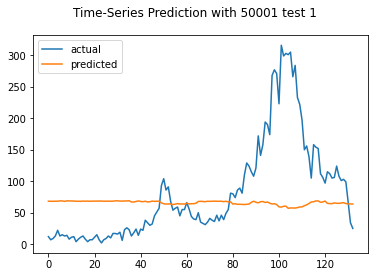

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAPE: 137.255
Test sMAPE: 84.117
Test RMSE: 89.735
{'mape': 137.25481078287254, 'smape': 84.11711630820906, 'rmse': 89.73461158868493}


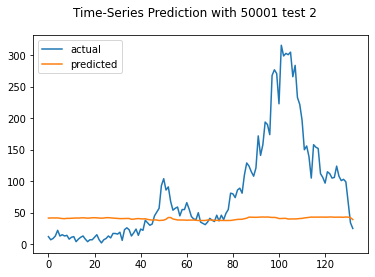

rmse : average=87.793, std=2.609
mape : average=155.996, std=53.004
smape : average=81.058, std=4.878
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Bucaramanga---------------------------------------------
####################################################################################################
The train shape is: (540, 1)
The test shape is: (136, 1)
The shape of the features is (537

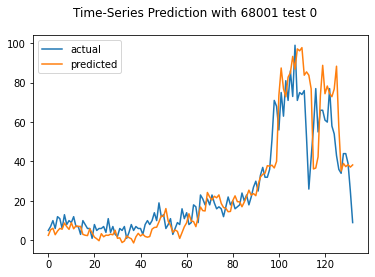

Restoring model weights from the end of the best epoch.
Epoch 00046: early stopping
Test MAPE: 43.388
Test sMAPE: 34.985
Test RMSE: 11.682
{'mape': 43.38813172393971, 'smape': 34.98503505669438, 'rmse': 11.682143868277693}


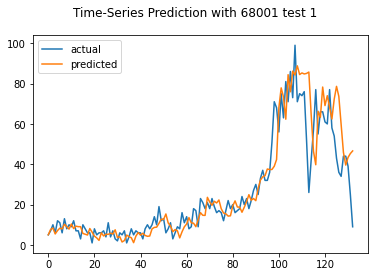

Restoring model weights from the end of the best epoch.
Epoch 00059: early stopping
Test MAPE: 96.594
Test sMAPE: 97.112
Test RMSE: 13.318
{'mape': 96.5935126098958, 'smape': 97.11243145865502, 'rmse': 13.317987595631031}


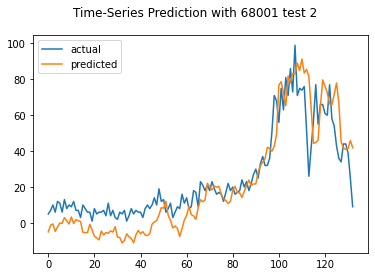

rmse : average=12.512, std=0.668
mape : average=61.608, std=24.746
smape : average=60.684, std=26.474
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Barranquilla--------------------------------------------
####################################################################################################
The train shape is: (540, 1)
The test shape is: (136, 1)
The shape of the features is (537

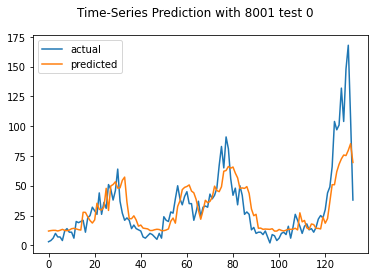

Restoring model weights from the end of the best epoch.
Epoch 00052: early stopping
Test MAPE: 54.718
Test sMAPE: 38.096
Test RMSE: 15.994
{'mape': 54.71818144671929, 'smape': 38.09564788879429, 'rmse': 15.993720659032792}


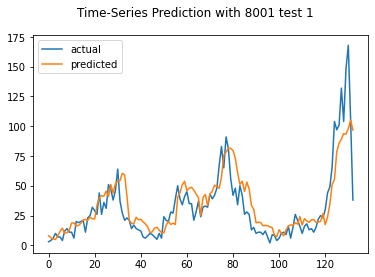

Restoring model weights from the end of the best epoch.
Epoch 00060: early stopping
Test MAPE: 57.347
Test sMAPE: 57.870
Test RMSE: 19.172
{'mape': 57.34702517499254, 'smape': 57.869524007390716, 'rmse': 19.172437159595436}


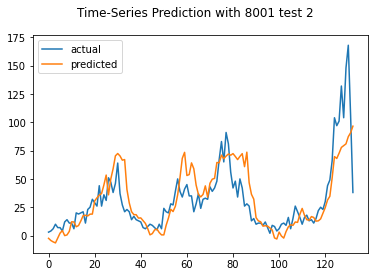

rmse : average=17.510, std=1.302
mape : average=55.447, std=1.356
smape : average=45.394, std=8.864
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Montería----------------------------------------------
####################################################################################################
The train shape is: (540, 1)
The test shape is: (136, 1)
The shape of the features is (537, 

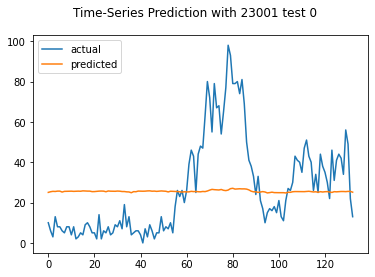

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAPE: inf
Test sMAPE: 79.898
Test RMSE: 25.243
{'mape': inf, 'smape': 79.89814004622968, 'rmse': 25.24303198823289}


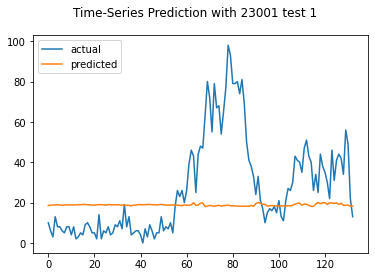

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAPE: inf
Test sMAPE: 83.013
Test RMSE: 25.613
{'mape': inf, 'smape': 83.01301605697182, 'rmse': 25.612626397999055}


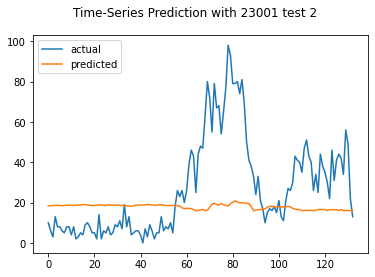

rmse : average=24.811, std=0.885
mape : average=inf, std=nan
smape : average=80.646, std=1.711
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
------------------------------------------------Cali------------------------------------------------
####################################################################################################
The train shape is: (540, 1)
The test shape is: (136, 1)
The shape of the features is (537, 3)
Th

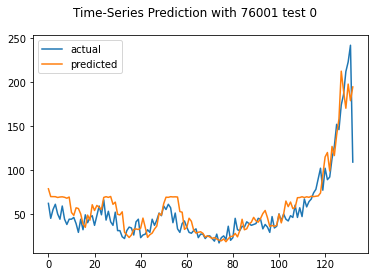

Restoring model weights from the end of the best epoch.
Epoch 00049: early stopping
Test MAPE: 33.166
Test sMAPE: 32.801
Test RMSE: 20.695
{'mape': 33.16561559168025, 'smape': 32.80120065599235, 'rmse': 20.69527951205468}


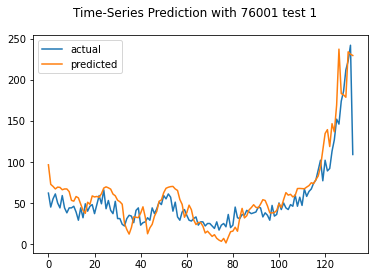

Restoring model weights from the end of the best epoch.
Epoch 00042: early stopping
Test MAPE: 40.002
Test sMAPE: 55.693
Test RMSE: 20.117
{'mape': 40.0017203465694, 'smape': 55.69271092129214, 'rmse': 20.11714554078198}


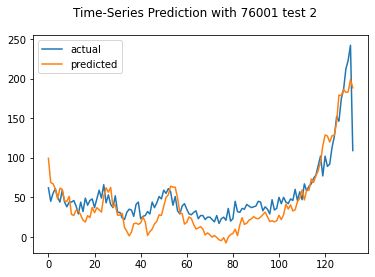

rmse : average=19.302, std=1.580
mape : average=33.063, std=5.707
smape : average=37.020, std=13.849
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Ibagué-----------------------------------------------
####################################################################################################
The train shape is: (540, 1)
The test shape is: (136, 1)
The shape of the features is (537,

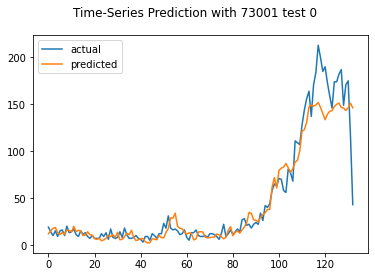

Restoring model weights from the end of the best epoch.
Epoch 00038: early stopping
Test MAPE: 40.543
Test sMAPE: 53.225
Test RMSE: 30.660
{'mape': 40.543083118989365, 'smape': 53.22461997892079, 'rmse': 30.65997432124639}


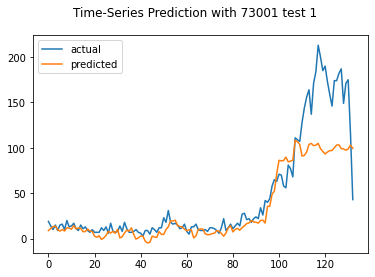

Restoring model weights from the end of the best epoch.
Epoch 00043: early stopping
Test MAPE: 143.043
Test sMAPE: 73.089
Test RMSE: 36.339
{'mape': 143.0432462664165, 'smape': 73.08942317450577, 'rmse': 36.33904518893331}


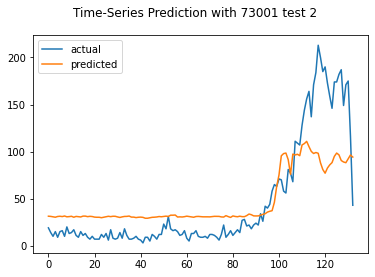

rmse : average=28.132, std=7.937
mape : average=72.324, std=50.091
smape : average=52.791, std=16.753
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Itagüí-----------------------------------------------
####################################################################################################
The train shape is: (540, 1)
The test shape is: (136, 1)
The shape of the features is (537

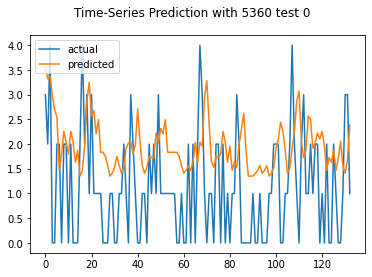

Restoring model weights from the end of the best epoch.
Epoch 00032: early stopping
Test MAPE: inf
Test sMAPE: 180.774
Test RMSE: 3.736
{'mape': inf, 'smape': 180.77364449980286, 'rmse': 3.736294198775983}


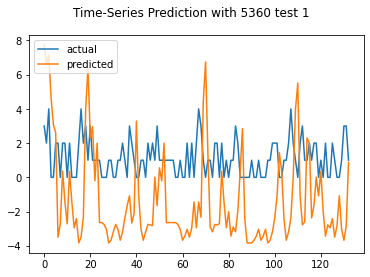

Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
Test MAPE: inf
Test sMAPE: 195.367
Test RMSE: 2.685
{'mape': inf, 'smape': 195.36672800676104, 'rmse': 2.6849476604600153}


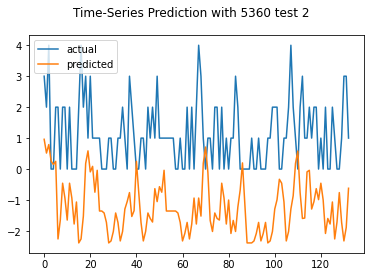

rmse : average=2.603, std=0.961
mape : average=inf, std=nan
smape : average=157.712, std=43.344
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################


In [5]:
results = run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=None, epochs=100, batch_size=16, n_tests=3, plot_samples=True)

In [6]:
results

{54001: {'rmse': [21.889122019945393, 5.390654783023954],
  'mape': [118.83066681306225, 31.884492760596594],
  'smape': [63.75356298576124, 7.463623285947621]},
 41001: {'rmse': [62.1856189510672, 4.584827032223692],
  'mape': [307.63948711793995, 64.33721922809464],
  'smape': [100.54455775126264, 9.39966198367003]},
 5001: {'rmse': [11.80444876033547, 1.722393230025123],
  'mape': [41.832959529305334, 8.882003996580242],
  'smape': [40.37859757108729, 8.971118848646361]},
 50001: {'rmse': [87.79297114875158, 2.6094257977939432],
  'mape': [155.99632654602152, 53.00386365219242],
  'smape': [81.05834960538193, 4.877610145746357]},
 68001: {'rmse': [12.51172619455597, 0.6680339683202575],
  'mape': [61.60763533125879, 24.745862999292264],
  'smape': [60.68357228195598, 26.473989786300482]},
 8001: {'rmse': [17.509751256988025, 1.3018424076475286],
  'mape': [55.44673210443784, 1.355836776914211],
  'smape': [45.39416379941088, 8.863834078161142]},
 23001: {'rmse': [24.811489882921077,